# Preprocessing
The steps performed here are Detrending and DC Offset removal. I find online that MEG devices introduce a "slow drift" or offset in the signal. This can be seen when plotted (the shape of the signal) when the signal drifts off and is not centered around 0 but higher or lower etc... This first step removes trends and makes it oscillate around 0. 

Then there is bandpass filtering. Brain activity supposedly is in certain frequency bands. Flow or fast frequencies are likely just noise and not actual brain activity. Se we filter those signals only within specific frequency bands.

Z-score normalisation (per channel) is done because the channels all have different absolute amplitudes, but we are interested in relative changes. So we make it so that every channel has zero mean and unit variance. So they will all contribute equally to machine learning.

Loading train data
['../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_4.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_1.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_6.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_2.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_3.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_8.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_5.h5', '../extracted_zip_in_here/Final Project data/Cross/train/rest_113922_7.h5']
Outliers detected: 25 for channel 0
Outliers detected: 4 for channel 1
Outliers detected: 6 for channel 2
Outliers detected: 10 for channel 3
Outliers detected: 76 for channel 4
Outliers detected: 82 for channel 5
Outliers detected: 15 for channel 6
Outliers detected: 9 for channel 7
Outliers detected: 19 for channel 8
Outliers detected: 10 for channel 9
Outliers detect

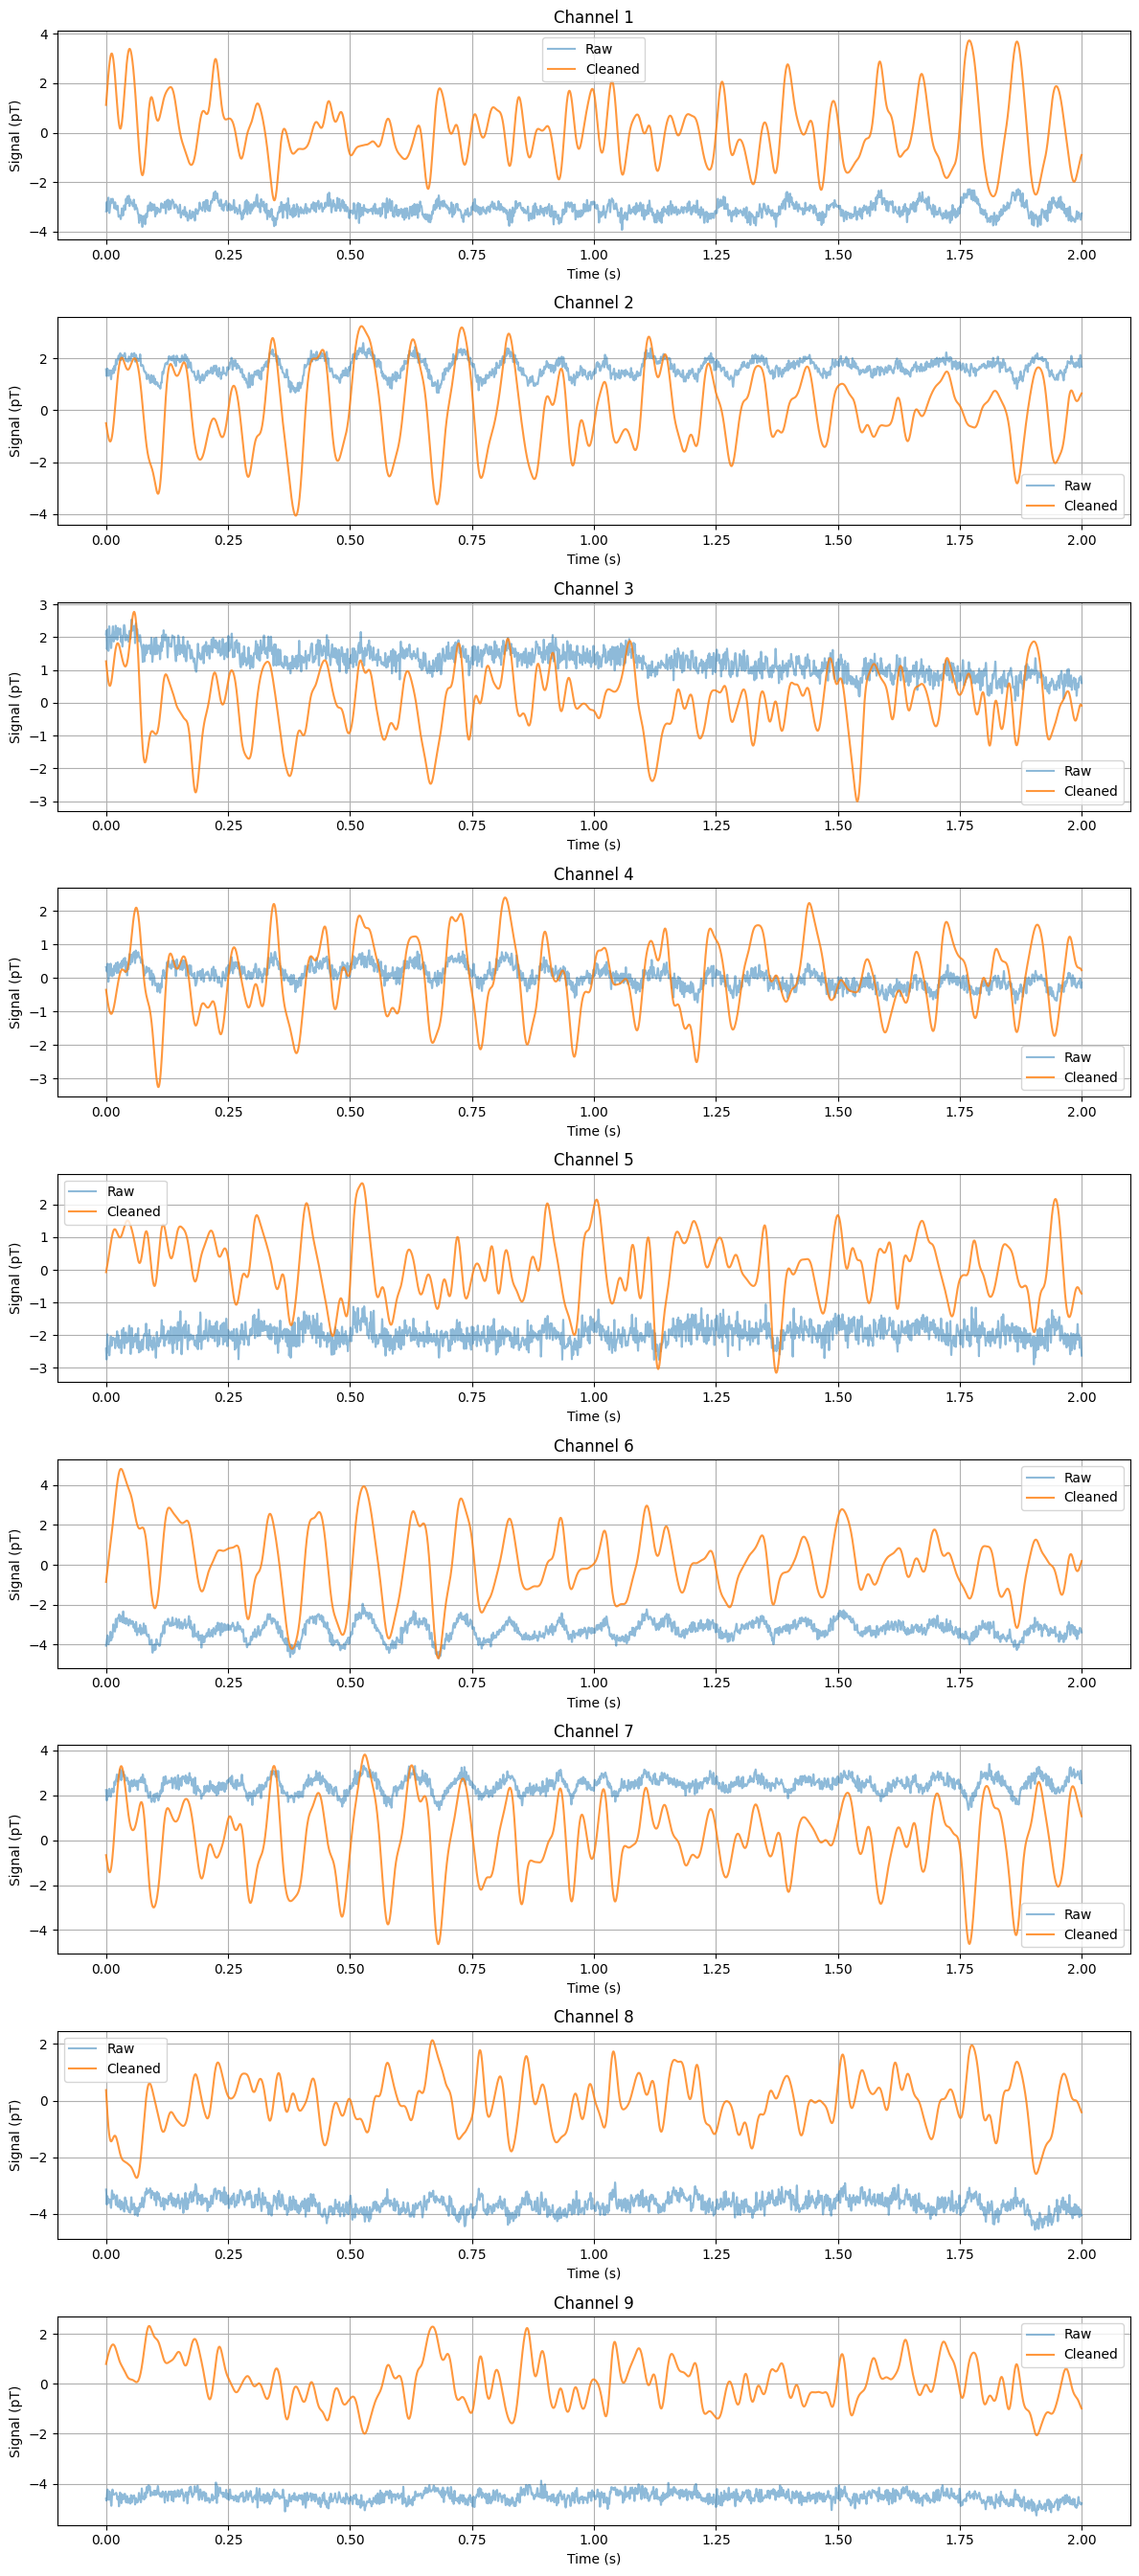

In [1]:
import sys
import os
import numpy

# Ensure the code folder is in the Python path
sys.path.append(os.path.abspath('.'))

from read_data import get_dataset_name_train, load_split_files
from meg_preprocessing import preprocess_meg, plot_meg_signals

# Get list of file paths for a subject
paths = get_dataset_name_train(file_name="113922", taskType="rest", typeData="Cross")

print(paths)

# Read data
if paths:
    subject_datas = load_split_files(paths)

file_names = list((subject_datas.keys()))
file_names.sort()

concatenated_data_rest_113922 = numpy.concatenate(
    [subject_datas[file_name] for file_name in file_names],
    axis=1)

# Run everything
data_raw = concatenated_data_rest_113922  # Concatenated and loaded
data_clean = preprocess_meg(numpy.copy(data_raw))

print("Making some example graphs to see the shape of the raw and processed data.")
plot_meg_signals(data_raw, data_clean, channels= range(1,10), fs=2034)
